# 정확도


In [1]:
import sklearn

print(sklearn.__version__)

1.6.1


In [2]:
import numpy as np
from sklearn.base import BaseEstimator

# 아주 단순한 연습용 분류기 만들기
class MyDummyClassifier(BaseEstimator):

    # 공부하는 함수 (하지만 우리는 공부 안 함)
    def fit(self,X,y=None):
        pass # 아무것도 하지 않고 그냥 넘어감
    
    # 예측하는 함수
    def predict(self,X):

        # 사람 수만큼 예측 결과를 적어둘 빈 칸 만들기
        # 처음에는 전부 0으로 채워둠
        pred=np.zeros((X.shape[0],1))

        # 사람 수만큼 한 명씩 반복
        for i in range(X.shape[0]):

            # i번째 사람의 성별 확인
            # Sex가 1이면 남자
            if X['Sex'].iloc[i] == 1:
                pred[i] =0  # 남자면 0이라고 예측
            # Sex가 0이면 여자
            else:
                pred[i] =1 # 여자면 1이라고 예측
                
        # 모든 사람의 예측 결과를 돌려줌
        return pred

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 빈칸(NaN)을 채워주는 함수
def fillna(df):
    # 나이(Age)가 비어 있으면 나이 평균으로 채움
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    # 객실 번호(Cabin)가 비어 있으면 'N'으로 채움
    df['Cabin'].fillna('N',inplace=True)
    # 탑승 항구(Embarked)가 비어 있으면 'N'으로 채움
    df['Embarked'].fillna('N',inplace=True)
    # 요금(Fare)이 비어 있으면 0으로 채움
    df['Fare'].fillna(0,inplace=True)
    # 빈칸이 채워진 데이터프레임을 다시 돌려줌
    return df

# 필요 없는 열을 삭제하는 함수
def drop_features(df):
    # 예측에 도움 안 되는 열들 삭제
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    # 열이 삭제된 데이터프레임 반환
    return df

# 글자 데이터를 정리하고 숫자로 바꾸는 함수
def format_features(df):
    # Cabin 값에서 맨 앞 글자만 사용 (구역 정보)
    df['Cabin']=df['Cabin'].str[:1]
    # 숫자로 바꿀 열 목록
    features=['Cabin','Sex','Embarked']
    # 하나씩 글자 → 숫자로 변환
    for feature in features:

        # 글자를 숫자로 바꿔주는 도구 생성
        le=LabelEncoder()
        # 이 열에 맞게 숫자 규칙 학습
        le=le.fit(df[feature])
        # 학습한 규칙으로 숫자로 변환
        df[feature]=le.transform(df[feature])
     # 변환된 데이터프레임 반환
    return df


In [ ]:
# 전처리를 한 번에 실행하는 함수
def transform_features(df):
    # 빈칸 채우기
    df=fillna(df)
    # 필요 없는 열 삭제
    df=drop_features(df)
    # 글자 데이터를 숫자로 바꾸기
    df=format_features(df)
    # 전처리 끝난 데이터 반환
    return df

아주 **정확한 지점에서 막혔어** 👍
여기서 헷갈리는 게 **정상**이고, 이걸 이해하면 머신러닝이 딱 보이기 시작해.

아주 쉽게, **개념만** 정리해줄게.

---

# ❓ 모델이 뭐야?

## 한 문장으로

> **모델 = 규칙(판단 방법)을 가진 기계**

---

## 🧸 초딩 비유로 먼저

### 🍎 과일 분류 게임

* 빨간 과일 → 사과
* 노란 과일 → 바나나

👉 이 **규칙 자체**가 바로 **모델**

---

# 🤖 머신러닝에서 모델이란?

> **입력(X)을 보고 → 출력(y)을 정하는 규칙 덩어리**

예:

* 입력: 나이, 성별, 요금
* 출력: 살아남음(1) / 사망(0)

---

# 🔥 그럼 네 코드에서 “모델”은 뭐야?

```python
myclf = MyDummyClassifier()
```

👉 **이 한 줄이 바로 모델 생성**

# 📌 `MyDummyClassifier`

“**성별만 보고 판단하는 규칙을 가진 기계**”

---

# 🧠 그럼 이 모델의 규칙은 뭐야?

👉 `predict()` 안에 있음

```python
if X['Sex'].iloc[i] == 1:
    pred[i] = 0
else:
    pred[i] = 1
```

### 즉 이 모델은 이렇게 생각함

```
남자면 → 죽음(0)
여자면 → 생존(1)
```

👉 **이게 모델의 전부**

---

# ❓ 그런데… 학습이 왜 안 느껴져?

너 지금 딱 이 생각 중이야 👇

> “fit 했는데 뭐 배운 게 없는 것 같은데?”

### ✅ 그게 맞아!

```python
def fit(self, X, y=None):
    pass
```

👉 **아무것도 안 배움**

📌 이 모델은:

* 데이터를 보고
* 규칙을 찾는 모델 ❌
* **사람이 규칙을 직접 써준 모델** ⭕

그래서 **학습이 없는 것처럼 보이는 게 맞음**

---

# 💡 그럼 fit은 왜 있어?

### 이유 2가지

1️⃣ **사이킷런 규칙**

* 모든 모델은 `fit()`이 있어야 함

2️⃣ **연습용 구조**

* “모델이 이런 구조구나” 이해용

---

# 🧩 진짜 머신러닝 모델은 뭐가 다르냐면

### 예: DecisionTreeClassifier

```python
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
```

이건 👇

* 데이터를 보고
* “아 이런 조건이면 살았구나”
* “이 값 이상이면 죽었구나”
* **규칙을 스스로 만듦**

👉 이게 **학습**

---

# ⚠️ 그래서 지금 “매칭이 안 되는 이유”

### 네가 느끼는 혼란의 정체 👇

| 네 생각          | 실제 상황            |
| ------------- | ---------------- |
| 모델이 배워야 한다    | ❌ 이 모델은 안 배움     |
| fit 하면 뭔가 생긴다 | ❌ pass라서 없음      |
| 학습된 규칙이 있다    | ⭕ predict에 이미 있음 |

---

# 🎯 지금 이 코드는 뭐 하는 중이냐면

> **“머신러닝이 얼마나 똑똑해졌는지 비교하기 위한 기준선”**

즉,

* 이 정도 규칙만 써도 정확도가 이만큼 나와
* 👉 진짜 모델이 이걸 **이겨야 함**

---

# 🧠 진짜 핵심 한 줄 정리

> ❌ 이 Dummy 모델은 **학습 안 하는 모델**
> ⭕ **규칙을 직접 써 넣은 장난감 모델**

---

# 🚀 다음 단계로 딱 좋은 흐름

이제 여기로 가면 **완벽하게 이어져**

1️⃣ 이 Dummy 정확도 기억
2️⃣ `DecisionTreeClassifier`로 바꿈
3️⃣ 정확도 비교
4️⃣ “아 그래서 ML이 필요한 거구나” 깨달음 💡

---

원하면 다음 바로 해줄게 👇

* ✔️ **Dummy → DecisionTree 바꾸기**
* ✔️ 진짜 `fit()`이 뭘 하는지 눈으로 보기
* ✔️ 정확도 왜 달라지는지 설명

👉 다음 뭐 볼까?


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 타이타닉 데이터 불러오기
titanic_df=pd.read_csv("./titanic_train.csv")
# 정답(살았는지 여부)
y_titanic_df=titanic_df['Survived']
# 문제 데이터 (정답 열 제거)
X_titanic_df=titanic_df.drop('Survived',axis=1)
# 문제 데이터 전처리
X_titanic_df=transform_features(X_titanic_df)
# 공부용(80%) / 시험용(20%) 데이터 나누기
X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,\
                                               test_size=0.2,random_state=0 )


# 내가 만든 아주 단순한 분류기 생성
myclf=MyDummyClassifier()
# 모델 공부시키기
myclf.fit(X_train,y_train)

# 시험 데이터로 예측하기
mypredictions=myclf.predict(X_test)
# 예측이 얼마나 맞았는지 정확도 출력
print("Dummy Classifier 의 정확도 는 {0:.4f}".format(accuracy_score(y_test,mypredictions)))

Dummy Classifier 의 정확도 는 0.7877


C:\Users\User\AppData\Local\Temp\ipykernel_22612\3470271490.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_22612\3470271490.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# 아무 생각 없이 예측하는 가짜 분류기
class MyFakeClassifier(BaseEstimator):

    # 공부하는 함수 (하지만 아무것도 안 함)
    def fit(self,X,y):
        pass
     # 예측하는 함수
    def predict(self,X):
        # 데이터 개수만큼 전부 False(0)로 예측
        return np.zeros((len(X),1),dtype=bool)

# 숫자 손글씨 데이터 불러오기
digits=load_digits()

# 입력 데이터 출력 (숫자 그림 정보)
print(digits.data)
# 입력 데이터 크기 확인
print("### digits.data.shape:",digits.data.shape)
# 정답 데이터 출력 (0~9 숫자)
print(digits.target)
# 정답 데이터 크기 확인
print("### digits.target.shape:",digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [7]:
# "이 값이 7이니?" 라고 하나씩 물어봄
digits.target==7

array([False, False, False, ..., False, False, False])

In [8]:
# 정답을 "7이다 / 아니다" 문제로 바꾸기
# 7이면 1, 7이 아니면 0

y=(digits.target ==7).astype(int)

# 숫자 그림 데이터와 정답을
# 공부용(train)과 시험용(test)으로 나누기
X_train,X_test,y_train,y_test=train_test_split(digits.data,# 문제(숫자 그림 정보)
                                               y, # 정답(7이면 1, 아니면 0)
                                               random_state=11)   # 항상 같은 방식으로 나누기
 

In [9]:
# 시험용 정답 데이터의 개수 출력
print("레이블 테스트 세트 크기:",y_test.shape)

# 시험 정답에서 0과 1이 얼마나 있는지 확인
print("테스트 세트 레이블 0과 1의 분포도")
print(pd.Series(y_test).value_counts())

# 아무 생각 없이 0만 예측하는 가짜 모델 생성
fakeclf=MyFakeClassifier()
# 모델 학습 (하지만 실제로는 아무것도 안 배움)
fakeclf.fit(X_train,y_train)
# 시험 데이터로 예측 (전부 0으로 예측)
fakepred=fakeclf.predict(X_test)
# 전부 0으로 찍었을 때의 정확도 출력
print("모든 예측을 0으로 하여도 정확도는 : {:.3f}".format(accuracy_score(y_test,fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는 : 0.900


## Confusion Matrix

In [10]:
# 혼동행렬 계산 도구 불러오기
from sklearn.metrics import confusion_matrix

# 실제 정답과 예측 결과를 표로 정리해서 보여줌
confusion_matrix(y_test,fakepred)

array([[405,   0],
       [ 45,   0]])

## 정밀도(Precision) 과 재현율(Recall)

In [11]:
# 정확도, 정밀도, 재현율 계산 도구 불러오기
from sklearn.metrics import accuracy_score,precision_score,recall_score

# 정밀도 출력
# "1이라고 예측한 것 중 진짜 1은 몇 개?"
# → 이 모델은 1을 예측한 적이 없어서 0
print("정밀도:",precision_score(y_test,fakepred))

# 재현율 출력
# "진짜 1 중에서 맞힌 게 몇 개?"
# → 이 모델은 7을 하나도 못 맞혀서 0
print("재현율:",recall_score(y_test,fakepred))

정밀도: 0.0
재현율: 0.0


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix


def get_clf_eval(y_test,pred):

    # 1️⃣ 오차 행렬 계산
    # 맞춘 것 / 틀린 것을 표 형태로 정리
    confusion=confusion_matrix(y_test,pred)

    #2️⃣ 정확도 계산
    # 전체 중에서 얼마나 맞았는지
    accuracy=accuracy_score(y_test,pred)

    # 3️⃣ 정밀도 계산
    # 1이라고 예측한 것 중 진짜 1 비율
    precision=precision_score(y_test,pred)

    # 4️⃣ 재현율 계산
    # 실제 1 중에서 얼마나 잘 맞췄는지
    recall=recall_score(y_test,pred)


    # 5️⃣ 결과 출력
    print("오차 행렬")
    print(confusion)
    print("정확도 :{0:.4f}, 정밀도: {1:.4f}, 재현율 {2:.4f}".format(accuracy,precision,recall))

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# 1️⃣ 타이타닉 데이터 파일 읽기
titanic_df=pd.read_csv("./titanic_train.csv")
# 2️⃣ 정답 데이터 (살았는지 여부)
y_titanic_df=titanic_df['Survived']
# 3️⃣ 입력 데이터 (Survived 제외)
X_titanic_df=titanic_df.drop('Survived',axis=1)
# 4️⃣ 데이터 전처리 (문자 → 숫자, 결측치 처리 등)
X_titanic_df=transform_features(X_titanic_df)

# 5️⃣ 학습용 / 테스트용 데이터 분리 (80% / 20%)
X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,\
                                               test_size=0.20,random_state=11)
# 6️⃣ 로지스틱 회귀 모델 생성
lr_clf=LogisticRegression()

# 7️⃣ 모델 학습
lr_clf.fit(X_train,y_train)

# 8️⃣ 테스트 데이터 예측
pred=lr_clf.predict(X_test)
# 9️⃣ 성능 평가 출력
get_clf_eval(y_test,pred)

C:\Users\User\AppData\Local\Temp\ipykernel_22612\3470271490.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_22612\3470271490.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

오차 행렬
[[104  14]
 [ 13  48]]
정확도 :0.8492, 정밀도: 0.7742, 재현율 0.7869


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 1️⃣ 테스트 데이터에 대해 각 클래스의 확률 예측
# [클래스0일 확률, 클래스1일 확률]
pred_proba=lr_clf.predict_proba(X_test)

# 2️⃣ 확률을 기준으로 최종 클래스(0 또는 1) 예측
pred=lr_clf.predict(X_test)

# 3️⃣ 확률 예측 결과의 크기 확인
# (데이터 개수, 클래스 개수)
print('pred_proba() 결과 Shape: {0}'.format(pred_proba.shape))

# 4️⃣ 확률 예측 결과 중 앞의 3개만 확인
print("pred_proba array에서 앞 3개만 샘플로 추출 \n:",pred_proba[:3])


# 5️⃣ 확률 결과 + 최종 예측값을 한 표로 합치기
# pred는 1차원이므로 reshape로 열(column) 형태로 변환
pred_proba_result=np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
print("두개의 class중에서 더 큰 확률을 클래스 값으로 예측 \n",pred_proba_result[:3])

pred_proba() 결과 Shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46192575 0.53807425]
 [0.87867657 0.12132343]
 [0.87716169 0.12283831]]
두개의 class중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46192575 0.53807425 1.        ]
 [0.87867657 0.12132343 0.        ]
 [0.87716169 0.12283831 0.        ]]


In [ ]:
from sklearn.preprocessing import Binarizer

# 1️⃣ 이진화할 숫자 데이터
X=[[1,-1,2],
   [2,0,0],
   [0,1.1,1.2]]

# 2️⃣ Binarizer 생성
# threshold=1.1 → 1.1보다 크면 1, 작거나 같으면 0
binarizer=Binarizer(threshold=1.1)

# 3️⃣ 기준선에 따라 0 또는 1로 변환
# fit은 형식상 필요, 실제 학습은 없음
# transform이 실제 변환 작업
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
from sklearn.preprocessing import Binarizer

# 1️⃣ 내가 직접 정한 임계값
# 기본값 0.5 대신 0.4 사용
custom_threshold=0.4


# 2️⃣ 예측 확률 중에서 "클래스 1(생존)" 확률만 추출
# Binarizer는 2차원 입력을 원하므로 reshape
pred_proba_1=pred_proba[:,1].reshape(-1,1)


# 3️⃣ Binarizer 생성
# 확률이 0.4보다 크면 1, 아니면 0
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
# 4️⃣ 확률 → 이진 값(0 / 1)으로 변환
custom_predict=binarizer.transform(pred_proba_1)

# 5️⃣ 새 임계값 기준으로 성능 평가
get_clf_eval(y_test,custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도 :0.8324, 정밀도: 0.7183, 재현율 0.8361


In [24]:
# 여러 개의 임계값을 미리 설정
thresholds=[0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
     # thresholds 리스트에 있는 임계값을 하나씩 사용
    for custom_threshold in thresholds:

        # 1️⃣ 현재 임계값으로 Binarizer 생성
        # 확률 > 임계값 → 1, 아니면 0
        binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        # 2️⃣ 확률 값을 0 / 1 예측값으로 변환
        custom_predict=binarizer.transform(pred_proba_c1)
        # 3️⃣ 현재 사용 중인 임계값 출력
        print("임곗값:",custom_threshold)
        # 4️⃣ 실제 정답과 비교하여 성능 평가 출력
        get_clf_eval(y_test,custom_predict)


# 함수 실행
# pred_proba[:,1] → 클래스 1의 확률만 사용
# reshape → Binarizer 입력 형태 맞추기
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)



임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도 :0.8324, 정밀도: 0.7183, 재현율 0.8361
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도 :0.8492, 정밀도: 0.7656, 재현율 0.8033
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도 :0.8492, 정밀도: 0.7742, 재현율 0.7869
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도 :0.8659, 정밀도: 0.8364, 재현율 0.7541
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도 :0.8771, 정밀도: 0.8824, 재현율 0.7377


In [25]:
from sklearn.preprocessing import Binarizer

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        # 1️⃣ Binarizer 객체 생성
        binarizer = Binarizer(threshold=custom_threshold)
        
        # 2️⃣ 확률 → 0/1 변환
        custom_predict = binarizer.fit_transform(pred_proba_c1)
        
        print("임곗값:", custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(
    y_test,
    pred_proba[:, 1].reshape(-1, 1),
    thresholds
)


임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도 :0.8324, 정밀도: 0.7183, 재현율 0.8361
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도 :0.8492, 정밀도: 0.7656, 재현율 0.8033
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도 :0.8492, 정밀도: 0.7742, 재현율 0.7869
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도 :0.8659, 정밀도: 0.8364, 재현율 0.7541
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도 :0.8771, 정밀도: 0.8824, 재현율 0.7377


In [ ]:
from sklearn.metrics import precision_recall_curve

# 1️⃣ 테스트 데이터에 대해 "클래스 1" 확률만 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

# 2️⃣ 모든 임계값에 대해 정밀도 / 재현율 계산
precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_class1)

# 3️⃣ 반환된 배열들의 크기 확인
print("반환된 분류 결정 임곗값 배열의 Shape:",thresholds.shape)
print("반환된 precisions 배열의 Shape",precisions.shape)
print('반환된 recalls 배열의 Shape:',recalls.shape)

# 4️⃣ 앞부분 일부만 샘플로 확인
print("thresholds 5 sample:",thresholds[:5])
print("precisions 5 sample:",precisions[:5])
print("recalls 5 sample:",recalls[:5])

thr_index=np.arange(0,thresholds.shape[0],15)

print("샘플 추출을 위한 임계값 배열의 index 10개:",thr_index)

# 6️⃣ 선택된 임계값들 출력 (소수점 2자리)
print("샘플용 10개의 임곗값: ",np.round(thresholds[thr_index],2))

# 7️⃣ 해당 임계값에서의 정밀도 출력
print("샘플 임곗값별 정밀도 :",np.round(precisions[thr_index],3))

# 8️⃣ 해당 임계값에서의 재현율 출력
print("샘플 임곗값별 재현율: ",np.round(recalls[thr_index],3))



반환된 분류 결정 임곗값 배열의 Shape: (165,)
반환된 precisions 배열의 Shape (166,)
반환된 recalls 배열의 Shape: (166,)
thresholds 5 sample: [0.01163677 0.05295268 0.06228897 0.06365137 0.06864419]
precisions 5 sample: [0.34078212 0.34269663 0.34463277 0.34659091 0.34857143]
recalls 5 sample: [1. 1. 1. 1. 1.]
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곗값:  [0.01 0.09 0.11 0.13 0.15 0.23 0.35 0.5  0.63 0.75 0.89]
샘플 임곗값별 정밀도 : [0.341 0.372 0.415 0.448 0.505 0.585 0.688 0.774 0.913 0.935 0.938]
샘플 임곗값별 재현율:  [1.    1.    0.967 0.918 0.902 0.902 0.869 0.787 0.689 0.475 0.246]


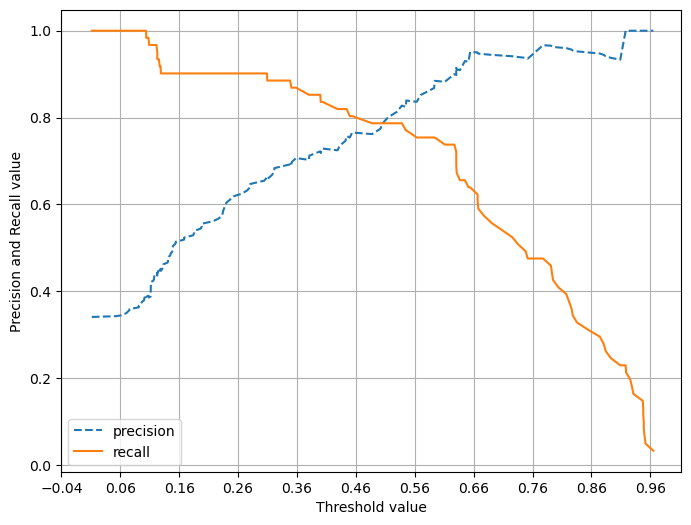

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def precision_recall_curve_plot(y_test,pred_proba_c1):

     # 1️⃣ 모든 임계값에 대한 정밀도 / 재현율 계산
    precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_c1)

    # 2️⃣ 그래프 크기 설정
    plt.figure(figsize=(8,6))

    # 3️⃣ thresholds 개수만큼만 precision, recall 사용
    threshold_boundary=thresholds.shape[0]

    # 4️⃣ 정밀도 그래프 (점선)
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    
    # 5️⃣ 재현율 그래프 (실선)
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')


    # 6️⃣ x축 범위 가져오기
    start,end=plt.xlim()

    # 7️⃣ x축 눈금을 0.1 단위로 보기 좋게 설정
    plt.xticks(np.round(np.arange(start,end,0.1),2))


    # 8️⃣ 축 이름 설정
    plt.xlabel('Threshold value'); plt.ylabel("Precision and Recall value")

    # 9️⃣ 범례와 격자 표시
    plt.legend(); plt.grid()
    # 🔟 그래프 출력
    plt.show()


# 함수 실행
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

## F1 SCORE

In [ ]:
from sklearn.metrics import f1_score


# 1️⃣ F1 스코어 단독 계산
f1=f1_score(y_test,pred)

print("F1 스코어: {0:.4f}".format(f1))

F1 스코어: 0.7805


In [ ]:
# 2️⃣ 분류 성능 평가 함수 정의
def get_clf_eval(y_test,pred):
    # 오차 행렬 계산
    confusion=confusion_matrix(y_test,pred)

    # 성능 지표 계산
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)

    f1=f1_score(y_test,pred)

    # 결과 출력
    print("오차 행렬")

    print(confusion)

    print("정확도 :{0:.4f},정밀도 :{1:.4f},재현율 :{2:.4f},F1 :{3:.4f}".format(accuracy,precision,recall,f1))


# 3️⃣ 여러 임계값 설정
thresholds=[0.4,0.45,0.50,0.55,0.60]
# 4️⃣ 테스트 데이터 예측 확률 계산
pred_proba=lr_clf.predict_proba(X_test)

# 5️⃣ 임계값별 성능 비교
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도 :0.8324,정밀도 :0.7183,재현율 :0.8361,F1 :0.7727
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도 :0.8492,정밀도 :0.7656,재현율 :0.8033,F1 :0.7840
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도 :0.8492,정밀도 :0.7742,재현율 :0.7869,F1 :0.7805
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도 :0.8659,정밀도 :0.8364,재현율 :0.7541,F1 :0.7931
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도 :0.8771,정밀도 :0.8824,재현율 :0.7377,F1 :0.8036


## ROC Curve 와 AUC

In [30]:
from sklearn.metrics import roc_curve

pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

fprs,tprs,thresholds=roc_curve(y_test,pred_proba_class1)

thr_index=np.arange(1,thresholds.shape[0],5)

print("샘플 추출을 위한 임곗값 배열의 index:",thr_index)

print("샘플 index로 추출한 임곗값: ",np.round(thresholds[thr_index],2))

print("샘플 임곗값별 FRP: ",np.round(fprs[thr_index],3))
print("샘플 임곗값 별 TPR: ",np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값:  [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값별 FRP:  [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값 별 TPR:  [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


In [31]:
from sklearn.metrics import roc_curve

pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

print("max predict_proba",np.max(pred_proba_class1))
print("thresholds[0]:",thresholds[0])

thr_index=np.arange(0,thresholds.shape[0],5)
print("샘플 추출을 위한 임겟값 배열의 index 10개:",thr_index)
print("샘플용 10개의 임곗값: ",np.round(thresholds[thr_index],2))

print("샘플  임곗값 별 FPR:",np.round(fprs[thr_index],3))
print("샘플 임겟값별 TPR: ",np.round(tprs[thr_index],3))

max predict_proba 0.9650985148636906
thresholds[0]: inf
샘플 추출을 위한 임겟값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45 50]
샘플용 10개의 임곗값:  [ inf 0.75 0.63 0.59 0.49 0.4  0.35 0.23 0.13 0.12 0.11]
샘플  임곗값 별 FPR: [0.    0.017 0.034 0.051 0.127 0.161 0.203 0.331 0.585 0.636 0.797]
샘플 임겟값별 TPR:  [0.    0.475 0.689 0.754 0.787 0.836 0.869 0.902 0.918 0.967 0.967]


In [ ]:
def roc_curve_plot(y_test,pred_proba_c1):
    fprs,tprs,thresholds=roc_curve(y_test,pred_proba_c1)

    plt.plot(fprs,tprs,label='ROC')

    plt.plot([0,1],[0,1],'k--',label='Random')


    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR')